In [2]:
#@title Get model coordinates
import plotly.express as px
import pandas as pd
import numpy as np

coor = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Pontevedra_Ria/ons/input_files/distan_lat42.38lon-8.94p3R1Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

In [29]:
# get model
met_model = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Pontevedra_Ria/ons/input_files/lat42.38lon-8.94p3R1KmD0.csv",parse_dates=["time"]).drop(columns=["Unnamed: 0"]).set_index("time")
station = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Pontevedra_Ria/ons/input_files/ons.csv", usecols = ["time","spd_ons","dir_ons"],parse_dates=["time"]).set_index("time")
station = station.resample("H",label="right",closed="right").mean()
df = pd.concat([met_model,station], axis=1).dropna()



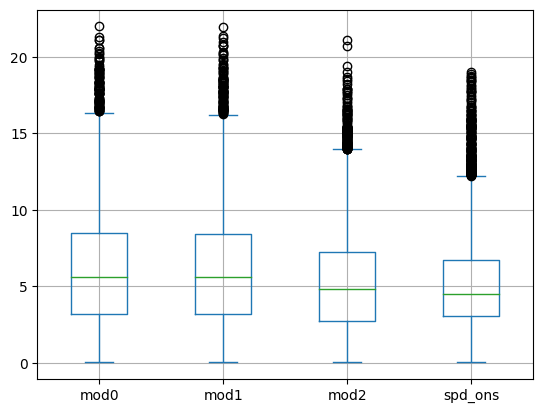

In [28]:
df[(df['dir_ons'] <= 359) & (df['dir_ons'] >= 180)][["mod0","mod1","mod2","spd_ons"]].plot(kind="box",grid=True);

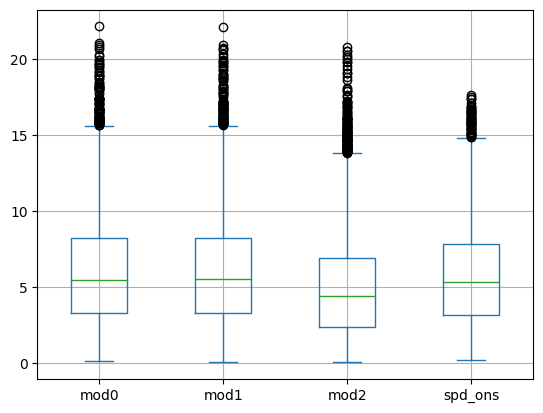

In [35]:
df[(df['dir_ons'] < 180)][["mod0","mod1","mod2","spd_ons"]].plot(kind="box",grid=True);

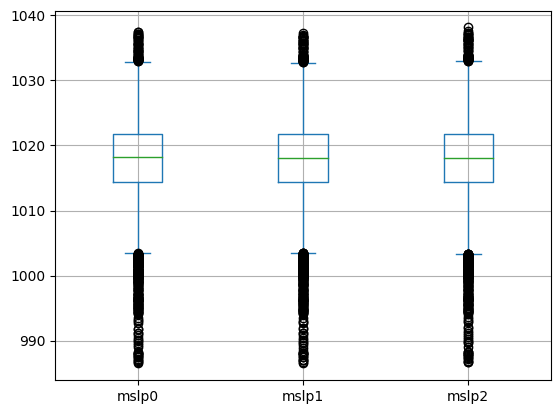

In [32]:
(df[(df['dir_ons'] <= 359) & (df['dir_ons'] >= 180)][["mslp0","mslp1","mslp2",]]/100).plot(kind="box",grid=True);

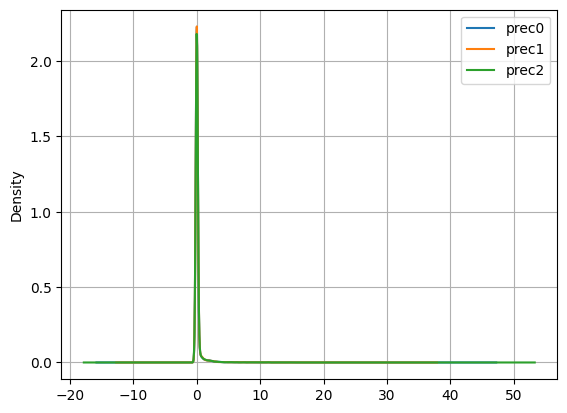

In [34]:
df[(df['dir_ons'] <= 359) & (df['dir_ons'] >= 180)][["prec0","prec1","prec2",]].plot(kind="kde",grid=True);

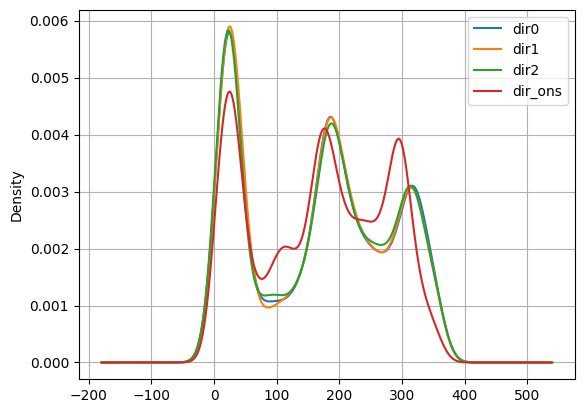

In [39]:
df[df['spd_ons'] >= 2][["dir0","dir1","dir2","dir_ons"]].plot(kind="kde",grid=True);

In [ ]:
df